<a href="https://colab.research.google.com/github/UsuarioVoltaire/Fundamentos-IA/blob/main/ClasificaVinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificar casos de Vinos

## Conjunto de datos
Usaremos el conjunto de datos de clasificación Wine Dataset que se puede obtener con scikit-learn. Este conjunto de datos está compuesto por 178 ejemplos con 13 atributos numéricos, el vino es obtenido de la misma región de Italia por diferentes viticultores, el objetivo es poder predecir por cuál.

In [ ]:
## Importamos las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Cargamos los datos con el cargador de sklearn
db = load_wine(return_X_y=False, as_frame=True)

Revisamos la descripción del conjunto:

In [ ]:
print(db.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Desplegamos los datos:

In [ ]:
db['data']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Exploramos la distribución de los valores de la variable objetivo:

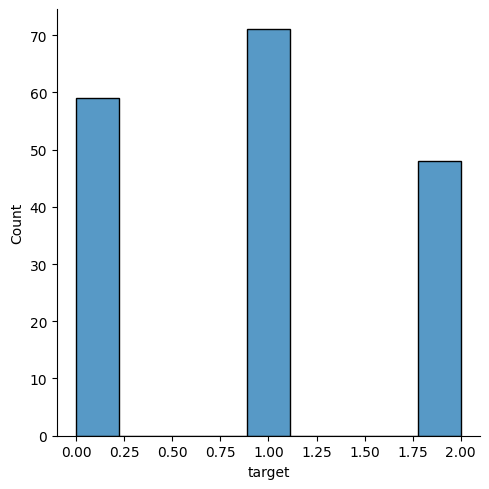

In [ ]:
sns.displot(db['target'][:])
plt.show()

In [ ]:
## Dividimos el conjunto en datos de entrenamiento y prueba
# e imprimimos la cantidad de cada uno

X_ent, X_prueba, y_ent, y_prueba = train_test_split(db['data'].to_numpy(),
                                                    db['target'].to_numpy(),
                                                    test_size = 0.40,
                                                    shuffle=True,
                                                    random_state=42)
print("Los datos de entrenamiento son: {0}. Los datos de prueba son: {1}".format(len(X_ent), len(X_prueba)))

Los datos de entrenamiento son: 106. Los datos de prueba son: 72


In [ ]:
## Instanciamos un clasificador
clf = SVC(kernel='linear', C = 0.5)

# Entrenamos el clasificador
clf.fit(X_ent, y_ent)

# Predecimos los datos de prueba generados
y_pred = clf.predict(X_prueba)

# Analizamos cuántos datos correctos clasifica
count = 0
for i in range(len(X_prueba)):
   count+=1 if y_pred[i]==y_prueba[i] else 0

print("Precisión: ", (count/len(X_prueba))*100)


Precisión:  94.44444444444444


In [ ]:
# Validación cruzada

scores = cross_val_score(clf, X_ent, y_ent, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.95454545 0.9047619  0.95238095 0.95238095 0.95238095]
Accuracy: 0.94 (+/- 0.04)


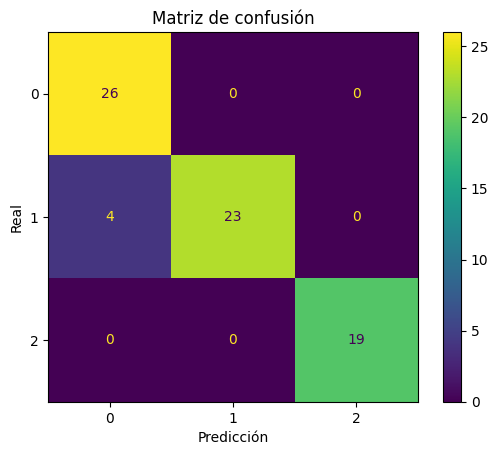

In [ ]:
# Matriz de confusión

conf = metrics.confusion_matrix(y_prueba, y_pred)
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=conf)
matrix.plot()
matrix.ax_.set(title="Matriz de confusión")
matrix.ax_.set(xlabel="Predicción", ylabel="Real")
plt.show()